# **Mumbai House Price Prediction Project**

## **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Mumbai House Prices.csv to Mumbai House Prices.csv


## **Data Onboarding**

In [5]:
# Reading the csv file
df = pd.read_csv('Mumbai House Prices.csv')
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [6]:
df.columns

Index(['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region',
       'status', 'age'],
      dtype='object')

## **EDA**

In [7]:
df.shape

(76038, 9)

In [8]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [9]:
df.tail()

,bhk,type,locality,area,price,price_unit,region,status,age
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown
76037,5,Apartment,Sunteck Signature Island,5200,25.00,Cr,Bandra Kurla Complex,Ready to move,Unknown


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [11]:
df.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [12]:
df['region'].value_counts()

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [13]:
df['type'].value_counts()

Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64

In [14]:
df['age'].value_counts()

New        38072
Resale     23357
Unknown    14609
Name: age, dtype: int64

## **Data Preprocessing**

In [15]:
df.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [16]:
df['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

### **Data Cleaning**

In [17]:
df1 = df.drop(['age', 'locality', 'status'], axis=1)
df1.head()

,bhk,type,area,price,price_unit,region
0,3,Apartment,685,2.50,Cr,Andheri West
1,2,Apartment,640,52.51,L,Naigaon East
2,2,Apartment,610,1.73,Cr,Borivali West
3,2,Apartment,876,59.98,L,Panvel
4,2,Apartment,659,94.11,L,Mira Road East


In [18]:
df1.columns

Index(['bhk', 'type', 'area', 'price', 'price_unit', 'region'], dtype='object')

In [19]:
df1['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7])

### **Crore To Lakhs Conversion**

In [20]:
crore_to_lakh_conversion = 100  # 1 Crore = 100 Lakhs

def convert_to_lakhs(row):
    if row["price_unit"] == "L":
        return row["price"]
    elif row["price_unit"] == "Cr":
        return row["price"] * crore_to_lakh_conversion

df1["price_lakhs"] = df1.apply(convert_to_lakhs, axis=1)

df2 = df1.drop(['price', 'price_unit'], axis=1)
df2.head()

,bhk,type,area,region,price_lakhs
0,3,Apartment,685,Andheri West,250.00
1,2,Apartment,640,Naigaon East,52.51
2,2,Apartment,610,Borivali West,173.00
3,2,Apartment,876,Panvel,59.98
4,2,Apartment,659,Mira Road East,94.11


### **Log Transform**

<ipython-input-21-a2cdc9376b4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df2['price_lakhs'])


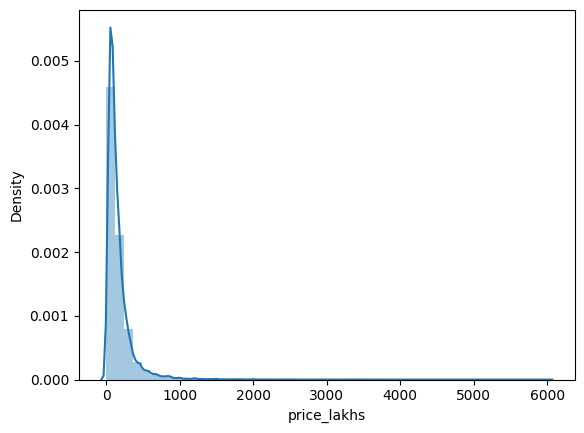

In [21]:
ax = sns.distplot(df2['price_lakhs'])

In [22]:
log_transform_y =  np.log(df2['price_lakhs'])

<ipython-input-23-b7193cfd695e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(log_transform_y)


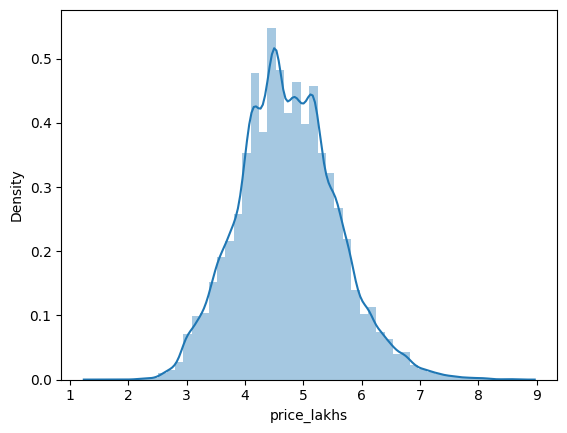

In [23]:
ax = sns.distplot(log_transform_y)

### **Adding a new Column Price per sqft**

In [24]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price_lakhs']/df3['area']
df3.head()

,bhk,type,area,region,price_lakhs,price_per_sqft
0,3,Apartment,685,Andheri West,250.00,0.364964
1,2,Apartment,640,Naigaon East,52.51,0.082047
2,2,Apartment,610,Borivali West,173.00,0.283607
3,2,Apartment,876,Panvel,59.98,0.068470
4,2,Apartment,659,Mira Road East,94.11,0.142807


In [25]:
df3['price_per_sqft'].describe()

count    76038.000000
mean         0.151188
std          0.093329
min          0.006468
25%          0.085714
50%          0.130000
75%          0.194961
max          1.823077
Name: price_per_sqft, dtype: float64

### **Numerical and Categorical Features**

In [26]:
numerical_features = df3[['bhk', 'area', 'price_lakhs', 'price_per_sqft']]
categorical_features = df3.select_dtypes(include=['object'])



```
# This is formatted as code
```

### **Box-Plots for Numerical Features to detect Outliers**

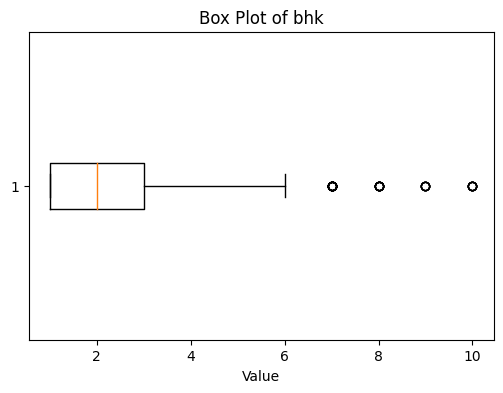

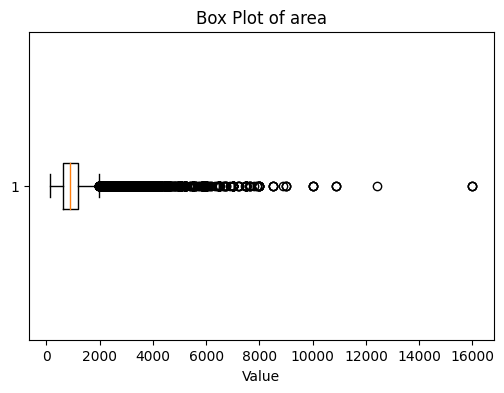

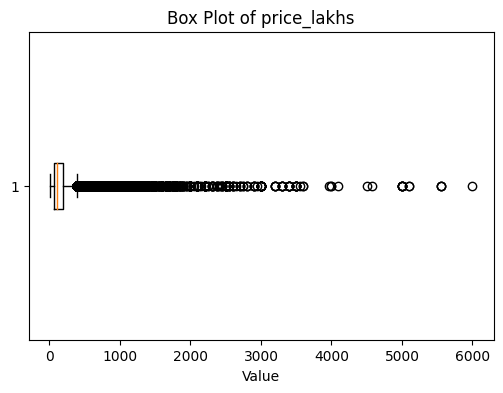

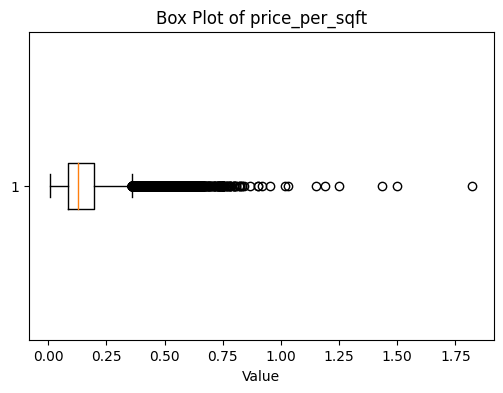

In [27]:
for i, column in enumerate(numerical_features.columns):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df3[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()

## **Standardizing The Numerical Features**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sr = StandardScaler()

standardized_features = sr.fit_transform(numerical_features)

std_df3 = pd.DataFrame(standardized_features, columns=numerical_features.columns)
std_df3.head()

,bhk,area,price_lakhs,price_per_sqft
0,1.067343,-0.506566,0.374808,2.290572
1,-0.016376,-0.573703,-0.532508,-0.740838
2,-0.016376,-0.618461,0.021052,1.418844
3,-0.016376,-0.221607,-0.498189,-0.886309
4,-0.016376,-0.545356,-0.341387,-0.089799


### **Correlation Matrix for the numerical variables**

In [30]:
std_df3.corr()

,bhk,area,price_lakhs,price_per_sqft
bhk,1.000000,0.787738,0.631353,0.362950
area,0.787738,1.000000,0.756000,0.216128
price_lakhs,0.631353,0.756000,1.000000,0.664473
price_per_sqft,0.362950,0.216128,0.664473,1.000000


### **Concat with the categorical features**

In [31]:
std_df4 = pd.concat([std_df3, categorical_features], axis=1)
std_df4.head()

,bhk,area,price_lakhs,price_per_sqft,type,region
0,1.067343,-0.506566,0.374808,2.290572,Apartment,Andheri West
1,-0.016376,-0.573703,-0.532508,-0.740838,Apartment,Naigaon East
2,-0.016376,-0.618461,0.021052,1.418844,Apartment,Borivali West
3,-0.016376,-0.221607,-0.498189,-0.886309,Apartment,Panvel
4,-0.016376,-0.545356,-0.341387,-0.089799,Apartment,Mira Road East


### **Dimensionality Reduction**

**Examine region which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [32]:
std_df4.region = std_df4.region.apply(lambda x: x.strip())
location_stats = std_df4['region'].value_counts(ascending=False)
location_stats

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [33]:
location_stats.values.sum()

76038

In [34]:
len(location_stats[location_stats>10])

114

In [35]:
len(location_stats[location_stats<=10])

114

In [36]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Kanjurmarg East      10
Vasind               10
Sector 20 Kamothe    10
Koproli              10
Cuffe Parade          9
                     ..
Police Colony         1
GTB Nagar             1
Bandra                1
Sector 14 Vashi       1
Goregaon              1
Name: region, Length: 114, dtype: int64

In [37]:
len(std_df4.region.unique())

228

In [38]:
std_df4.region = std_df4.region.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.region.unique())

228

In [39]:
std_df4.region.value_counts()

Thane West           14868
Mira Road East        9902
Dombivali             3041
Kandivali East        2568
Kharghar              2362
                     ...  
Sector 21 Kamothe       16
Kalwa                   15
Nalasopara East         15
Vangani                 13
Saphale                 12
Name: region, Length: 115, dtype: int64

### **Shifting the price_lakhs to the end of df**

In [40]:
target_col = 'price_lakhs'
std_df4 = std_df4[[col for col in std_df4.columns if col != target_col] + [target_col]]
std_df4.head()

,bhk,area,price_per_sqft,type,region,price_lakhs
0,1.067343,-0.506566,2.290572,Apartment,Andheri West,0.374808
1,-0.016376,-0.573703,-0.740838,Apartment,Naigaon East,-0.532508
2,-0.016376,-0.618461,1.418844,Apartment,Borivali West,0.021052
3,-0.016376,-0.221607,-0.886309,Apartment,Panvel,-0.498189
4,-0.016376,-0.545356,-0.089799,Apartment,Mira Road East,-0.341387


## **One Hot Encoding of Categorical Variables : type, region**

### **Type**

In [41]:
df4 = std_df4.copy()
df4 = pd.get_dummies(df4, columns=['type'], prefix=['type'])
df4.head()

,bhk,area,price_per_sqft,region,price_lakhs,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa
0,1.067343,-0.506566,2.290572,Andheri West,0.374808,1,0,0,0,0
1,-0.016376,-0.573703,-0.740838,Naigaon East,-0.532508,1,0,0,0,0
2,-0.016376,-0.618461,1.418844,Borivali West,0.021052,1,0,0,0,0
3,-0.016376,-0.221607,-0.886309,Panvel,-0.498189,1,0,0,0,0
4,-0.016376,-0.545356,-0.089799,Mira Road East,-0.341387,1,0,0,0,0


### **Region**

In [42]:
df_encoded = pd.get_dummies(df4, columns=['region'], prefix=['region'])
df_encoded.head()

,bhk,area,price_per_sqft,price_lakhs,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,...,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Virar West,region_Wadala,region_Worli,region_other
0,1.067343,-0.506566,2.290572,0.374808,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.016376,-0.573703,-0.740838,-0.532508,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.016376,-0.618461,1.418844,0.021052,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.016376,-0.221607,-0.886309,-0.498189,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.016376,-0.545356,-0.089799,-0.341387,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_encoded.shape

(76038, 124)

## **Preparing the data to model**

### **X y split**

In [44]:
X = df_encoded.drop('price_lakhs', axis=1)
y = log_transform_y

### **Train-Test Split**

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### **Fitting the model**

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr.score(X_test,y_test)

0.9473846937574958

## **Evaluating the Model Predictions**

In [50]:
df = pd.DataFrame({'Actual': np.round(y_test, 2),
                   'Predicted': np.round(y_pred, 2)})
df.head(10)

,Actual,Predicted
7625,5.11,4.83
75492,4.32,4.12
66504,3.50,3.47
52577,4.61,4.70
38830,6.23,6.28
31203,4.99,4.99
54570,3.78,3.61
18291,5.24,5.03
6758,4.33,4.46
38694,4.04,4.33


### **Residual Analysis**

In [51]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

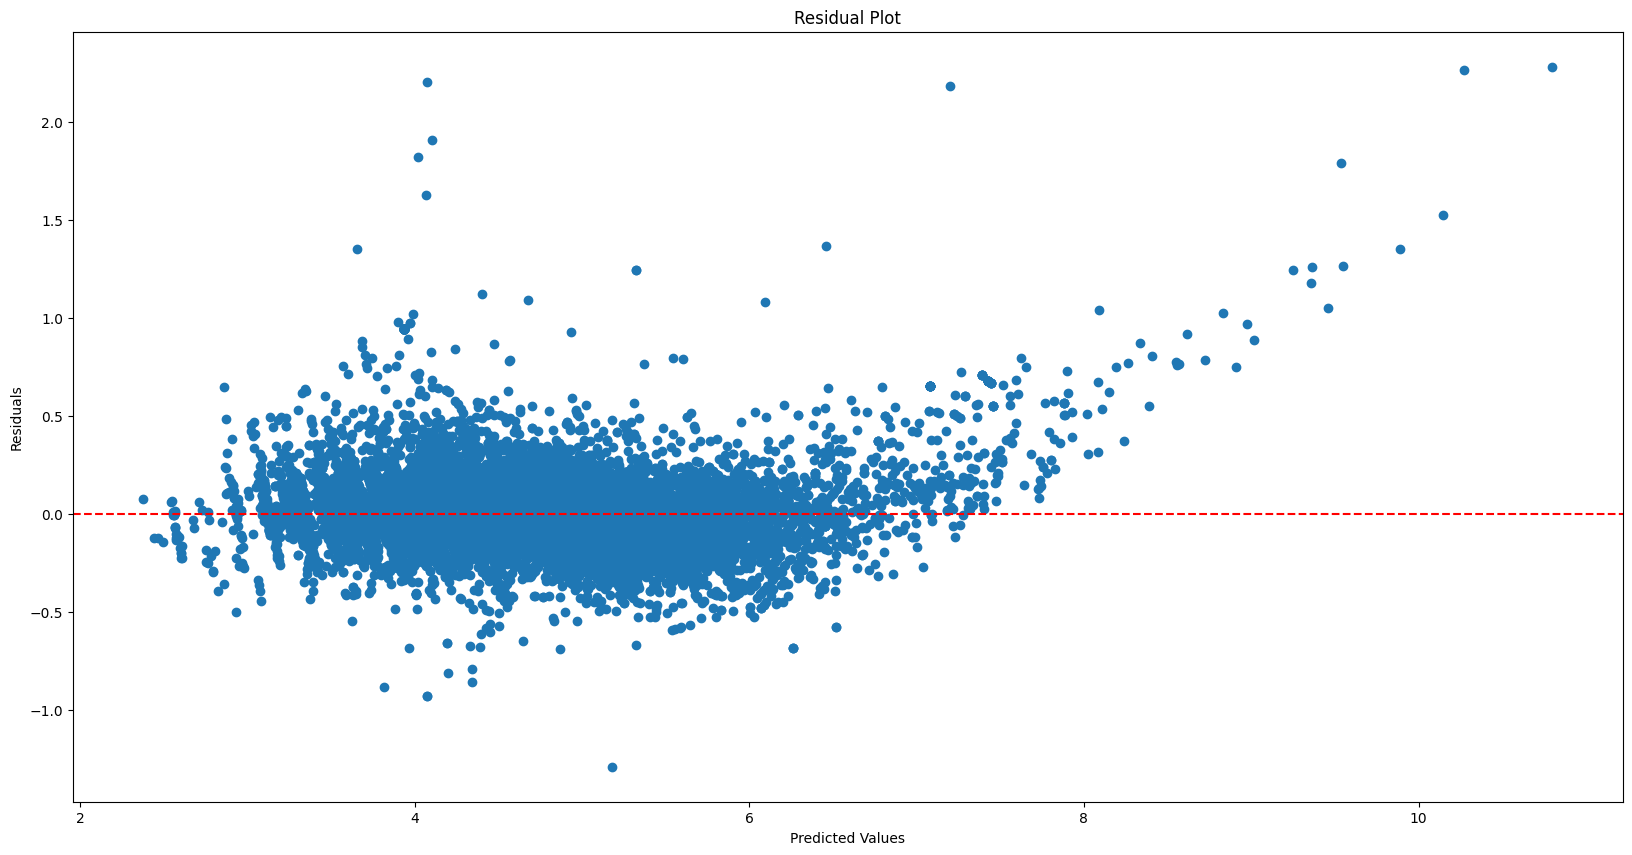

In [52]:
residuals = y_pred - y_test

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot indicates presence of outliers in the data

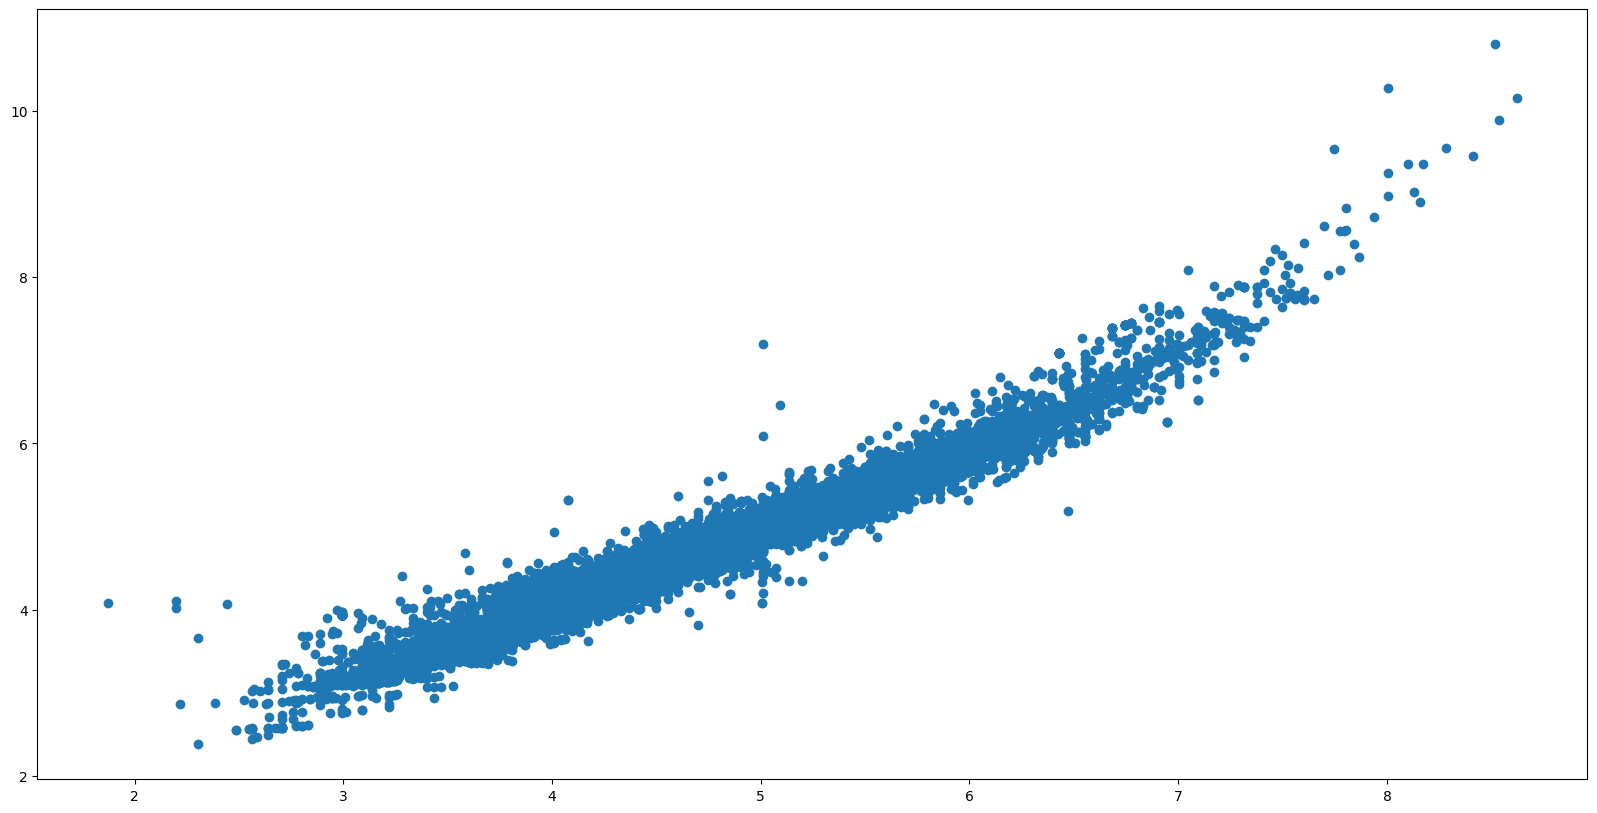

In [53]:
plt.scatter(y_test, y_pred)

Since the points cluster around the diagonal line, it indicates that the model is making reasonably accurate predictions. This is further supported by the distribution plot where the residuals are centered around 0.

<ipython-input-54-fcf983dcfc89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: xlabel='price_lakhs', ylabel='Density'>

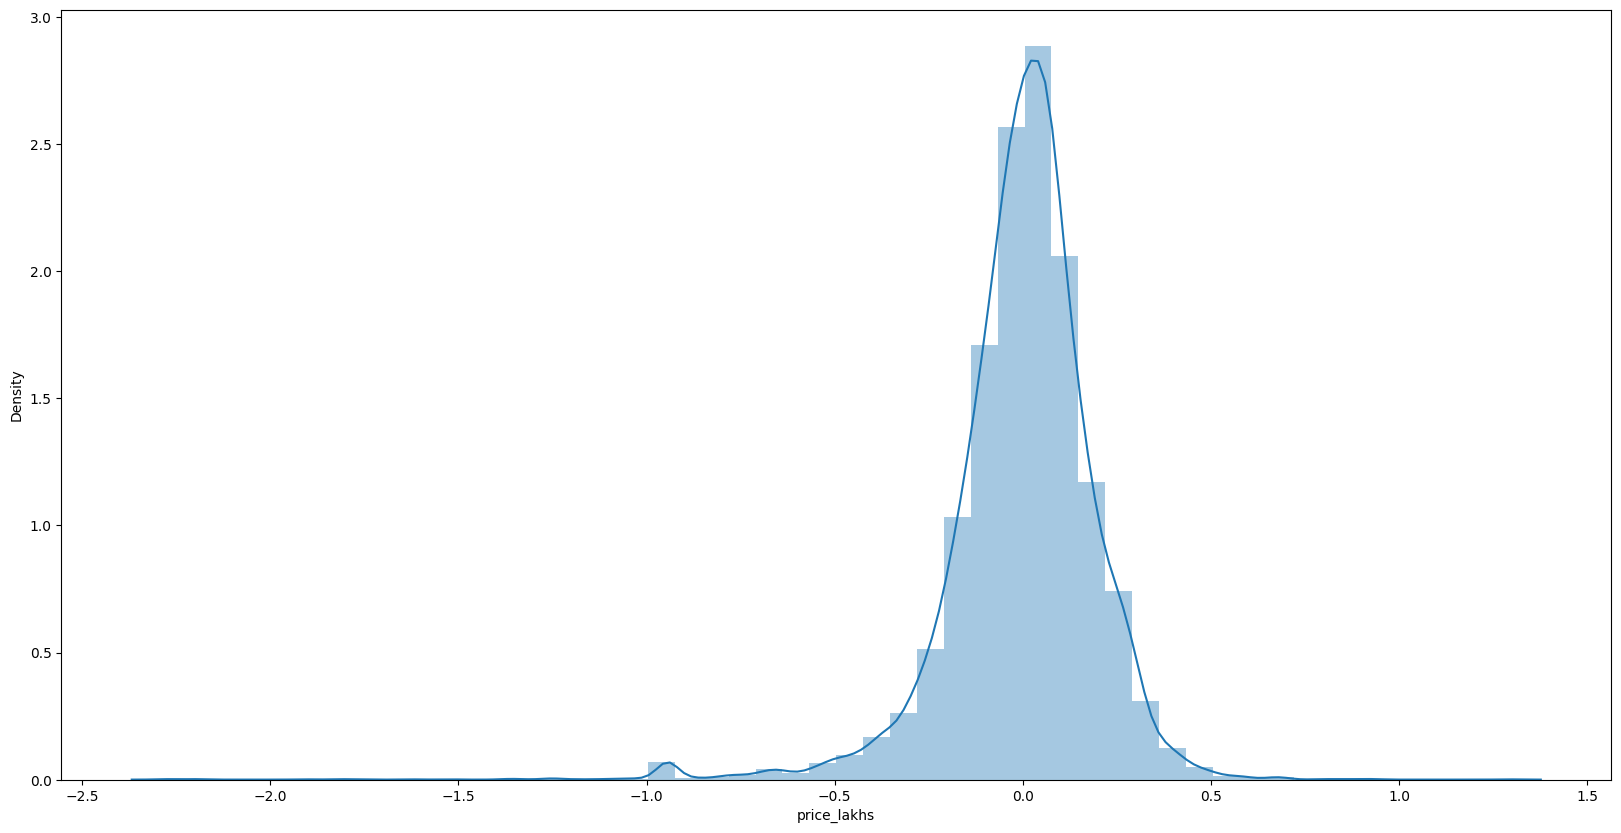

In [54]:
sns.distplot((y_test - y_pred))

### **Let us see the coefficients of our predictors**

In [55]:
coef = pd.DataFrame(data = lr.coef_, index = X.columns, columns = ['Coefficients'])
coef

,Coefficients
bhk,2.370356e-01
area,2.555648e-01
price_per_sqft,3.597501e-01
type_Apartment,1.321035e+11
type_Independent House,1.321035e+11
...,...
region_Virar,-2.315868e+10
region_Virar West,-2.315868e+10
region_Wadala,-2.315868e+10
region_Worli,-2.315868e+10


### **Further Evaluating the model using RMSE and R2**

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [59]:
print('Price mean:', np.round(np.mean(y), 2))
print('Price std:', np.round(np.std(y), 2))
print('MSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('MAE:', np.round(np.sqrt(metrics.mean_absolute_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 4.74
Price std: 0.84
MSE: 0.19
MAE: 0.37
R2 score train: 0.95
R2 score test: 0.95


In [60]:
print(lr.intercept_)

-108944783697.15643


**Exporting the model to a pickel file**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [63]:
import pickle
with open('mumbai_houses_price_prediction.pickle','wb') as f:
    pickle.dump(lr,f)

**Exporting column information that might be useful in future predictions**

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))